
___

<div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 24px; font-weight: bold;">
Tractament Nous Casos
  </span>
</div>


___

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


<div style="background-color:#F2F2F2; padding: 10px;">
    <div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 20px; font-weight: bold;">
1.  Pujem les dades
  </span>
</div>
</div>



In [53]:
casos_usuaris = pd.read_csv('Cases_extended.csv')
dataframe_llibres = pd.read_csv('Books.csv')

In [54]:
# Sanity check dels scores perque es tingui un rang tenint en compte les dades de base de llibres
casos_usuaris = pd.merge(casos_usuaris, dataframe_llibres[['id_llibre', 'valoracio']], left_on='id_llibre', right_on='id_llibre', how='left')

# Afegim el nombre de lectures dins la base de llibres nova
dataframe_llibres['num_lectures'] = [len(casos_usuaris[casos_usuaris['id_llibre'].isin([dataframe_llibres['id_llibre'][i]])]) for i in range(len(dataframe_llibres))]
casos_usuaris['score'] = (casos_usuaris['valoracio'].astype('float') + 5) / 2
casos_usuaris = casos_usuaris.drop('valoracio', axis=1)


In [55]:
casos_usuaris

,id_usuari,id_llibre,score,genere_persona,any_naixement,pref_adaptacio_peli,pref_best_seller,pref_tipus_lectura,pref_sagues,comprat,...,Ciencia_Ficcio,Comedia,Historica,Fantasia,Ciencia,Creixement_personal,Policiaca,Juvenil,pagines_max,Idioma
0,0,4,4.90,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
1,0,16,4.85,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
2,0,43,4.45,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
3,0,84,4.70,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
4,0,97,4.50,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,151,2,4.70,Dona,1971,Si,No,Fluida,No,No,...,0,0,1,0,0,1,1,0,150,"{'Espanyol', 'Català', 'Francès'}"
642,151,16,4.85,Dona,1971,Si,No,Fluida,No,No,...,0,0,1,0,0,1,1,0,150,"{'Espanyol', 'Català', 'Francès'}"
643,151,32,4.75,Dona,1971,Si,No,Fluida,No,No,...,0,0,1,0,0,1,1,0,150,"{'Espanyol', 'Català', 'Francès'}"
644,151,45,4.60,Dona,1971,Si,No,Fluida,No,No,...,0,0,1,0,0,1,1,0,150,"{'Espanyol', 'Català', 'Francès'}"


In [56]:
casos_nous = casos_usuaris[casos_usuaris['id_usuari'] > 51]

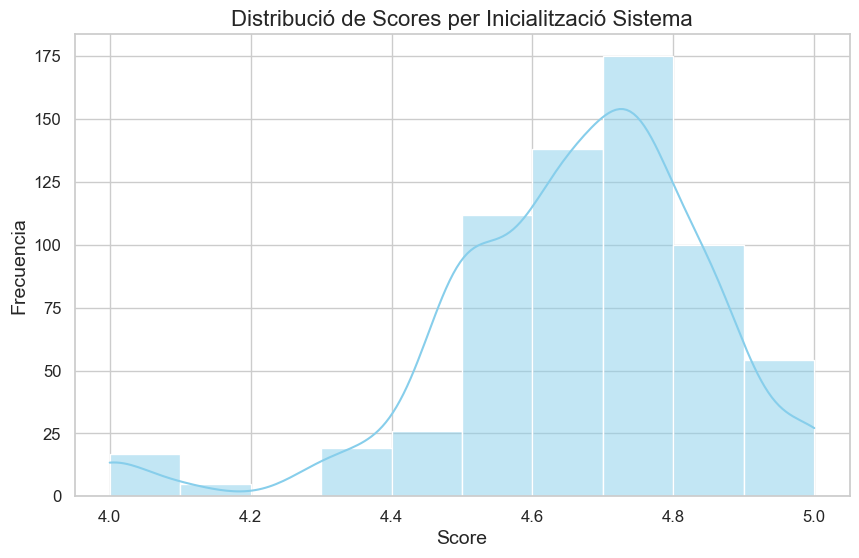

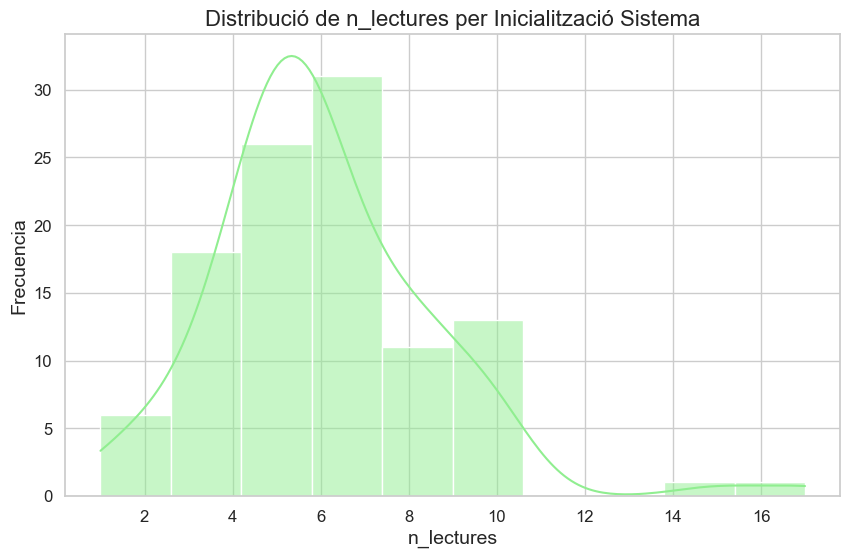

In [57]:
# Gràfic per visualitzar distribució de score per INICIALITZACIÓ
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(casos_usuaris['score'], kde=True, color='skyblue', bins=10)

# Personalizar el gráfico
plt.title('Distribució de Scores per Inicialització Sistema', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()


# Gràfic per visualitzar distribució de score per INICIALITZACIÓ
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(dataframe_llibres['num_lectures'], kde=True, color='lightgreen', bins=10)

# Personalizar el gráfico
plt.title('Distribució de n_lectures per Inicialització Sistema', fontsize=16)
plt.xlabel('n_lectures', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-info" style="color: #0277BD; background-color: #E1F5FE;">

Puntuar de manera manual els perfils a partir de visualitzar-los a la interfície.
    
</div>

In [59]:
casos_usuaris.to_csv('Cases_extended.csv', index=False)